In [28]:
import pandas as pd
import dirty_data as d
import algorithms_class as a
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import imputation as i
import outlier_detection as od
from utils import encoding_categorical_variables as enc
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv("../dataset/heart.csv")
name_class = 'disease'

selected_features = ['oldpeak','cp','thal', name_class]
selected_features_only = ['oldpeak','cp','thal']
df = df[selected_features]
quality = pd.DataFrame([50,60,70,80,90])
perc_quality = [50,60,70,80,90]

param = {
    'DecisionTree': 70,
    'LogisticRegression': 1,
    'KNN': 8,
    'RandomForest': 70,
    'AdaBoost': 90,
    'SVC': 1
}

In [30]:
def improve_completeness(df, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):
    df_clean = df[selected_features_only].copy()

    df_clean = i.impute(df_clean, imp_1, imp_col_1)
    df_clean = i.impute(df_clean, imp_2, imp_col_2)
    df_clean = i.impute(df_clean, imp_3, imp_col_3)

    df_clean[name_class] = df[name_class]

    return df_clean

def improve_accuracy(df, od_1, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class):
    df_clean = df[selected_features_only].copy()

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan

    df_clean[name_class] = df[name_class]

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, name_class)

    return df_clean

In [31]:
df_dirt_80 = d.injection(df, name_class, 80/100, 10, 1)
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)
df_100 = df

saved dirty dataset 80%
saved dirty dataset 90%


In [32]:
clf = NearestNeighbors(n_neighbors=param['KNN'])

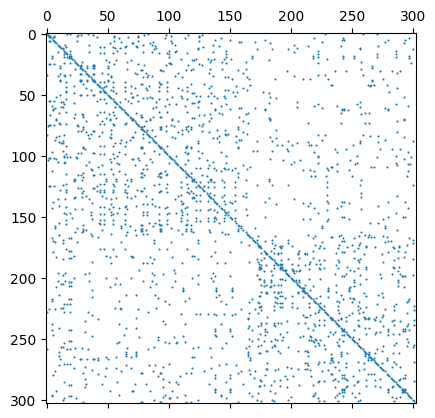

In [33]:
### quality 80%

X = enc(df_dirt_80[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_80 = clf.fit(X, df_dirt_80[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '80-d' + ".pdf", bbox_inches='tight')
plt.show()

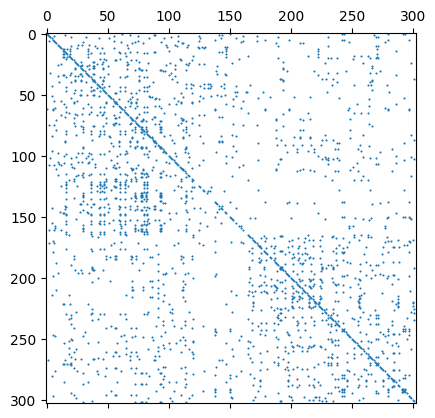

In [34]:
### quality 90%

X = enc(df_dirt_90[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_dirt_90 = clf.fit(X, df_dirt_90[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '90-d' + ".pdf", bbox_inches='tight')
plt.show()

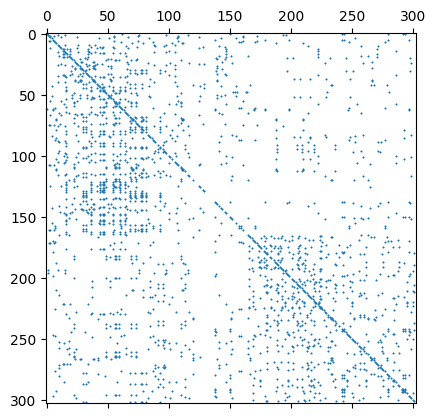

In [35]:
### quality 100%

X = enc(df_100[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_100 = clf.fit(X, df_100[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '100' + ".pdf", bbox_inches='tight')
plt.show()

In [36]:
df_dirt_70 = d.injection(df, name_class, 70/100, 10, 1)
df_dirt_80 = d.injection(df, name_class, 80/100, 10, 1)
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)

df_clean_70 = improve_accuracy(df_dirt_70, 'KNN', 'impute_median', 'impute_mode',
                                           'impute_mode', 'oldpeak','cp','thal', name_class)


df_clean_80 = improve_accuracy(df_dirt_80, 'KNN', 'impute_median', 'impute_mode',
                                           'impute_mode', 'oldpeak','cp','thal', name_class)

df_clean_90 = improve_accuracy(df_dirt_90, 'KNN', 'impute_median', 'impute_mode',
                                           'impute_mode', 'oldpeak','cp','thal', name_class)

saved dirty dataset 70%
saved dirty dataset 80%
saved dirty dataset 90%


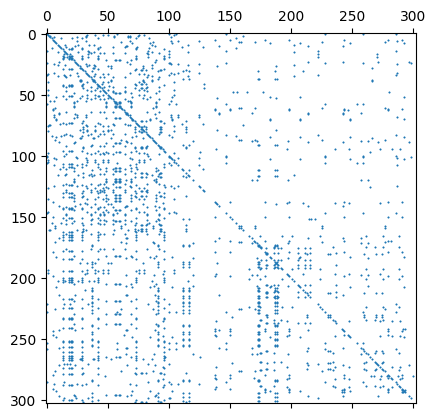

In [37]:
### quality 80%-clean

clf = NearestNeighbors(n_neighbors=param['KNN'])

X = enc(df_clean_80[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_80 = clf.fit(X, df_clean_80[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '80-c' + ".pdf", bbox_inches='tight')
plt.show()

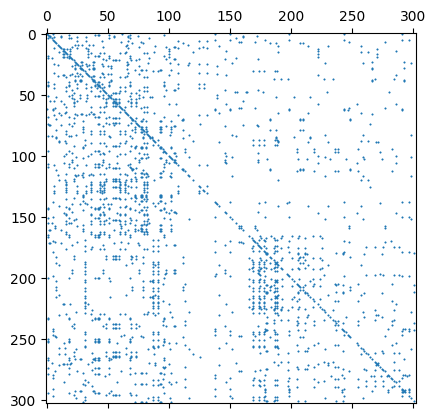

In [38]:
### quality 90%-clean

X = enc(df_clean_90[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_90 = clf.fit(X, df_clean_90[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '90-c' + ".pdf", bbox_inches='tight')
plt.show()

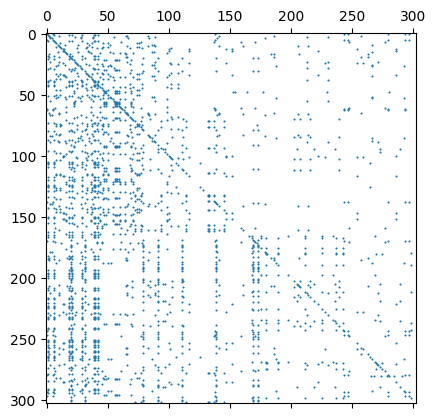

In [39]:
### quality 70%-clean

X = enc(df_clean_70[selected_features_only])
X = StandardScaler().fit_transform(X)
X = np.nan_to_num(X)

df_clean_70 = clf.fit(X, df_clean_70[name_class])
A = clf.kneighbors_graph(X)
A = A.toarray()
plt.spy(A, markersize=0.5)
plt.savefig("/Users/camillasancricca/Desktop/" + '70-c' + ".pdf", bbox_inches='tight')
plt.show()
